In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Load the data into a DataFrame
data = pd.read_csv('churn_raw_data.csv')

#Assess data types and null values
data_info = data.info()

#Check for missing values
missing_values = data.isnull().sum()

#Check for duplicates
duplicate_values =data.duplicated()

#Descriptive statistics for numeric columns
numeric_summary = data.describe()

# Print
print(data_info)
print(duplicate_values.value_counts())
print(missing_values)
print(numeric_summary)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

Rows with outliers:
      Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0              1          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
8              9          9     M716771  05a49ee3-8fd5-453a-a5f3-82b6cd986856   
10            11         11     J980369  89490f4b-765f-431a-b302-580aae7db71a   
11            12         12     E243720  c32b8522-d62a-49b1-a77a-e0534cb1378b   
20            21         21     X325271  ebf7fbd7-9f65-48d8-8f82-b7b7fd4f3412   
...          ...        ...         ...                                   ...   
9967        9968       9968     Q597995  17ead91e-fee8-4b36-bec3-60610ced2732   
9972        9973       9973     F952565  559568ad-0d48-4ebb-9bc8-f1a50230a1c2   
9984        9985       9985     W838935  723e3f1a-0ceb-44c9-b4be-ce53b4c72564   
9987        9988       9988     C454652  c4cb88a8-dd44-46a4-84e7-891edf25cbaf   
9996        9997       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   

       

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'CaseOrder'}>,
        <Axes: title={'center': 'Zip'}>, <Axes: title={'center': 'Lat'}>,
        <Axes: title={'center': 'Lng'}>],
       [<Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Children'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Outage_sec_perweek'}>],
       [<Axes: title={'center': 'Email'}>,
        <Axes: title={'center': 'Contacts'}>,
        <Axes: title={'center': 'Yearly_equip_failure'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'MonthlyCharge'}>],
       [<Axes: title={'center': 'Bandwidth_GB_Year'}>,
        <Axes: title={'center': 'item1'}>,
        <Axes: title={'center': 'item2'}>,
        <Axes: title={'center': 'item3'}>,
        <Axes: title={'center': 'item4'}>],
       [<Axes: title={'center': 'item5'}>,
        <Axes: title={'center': 'item6'

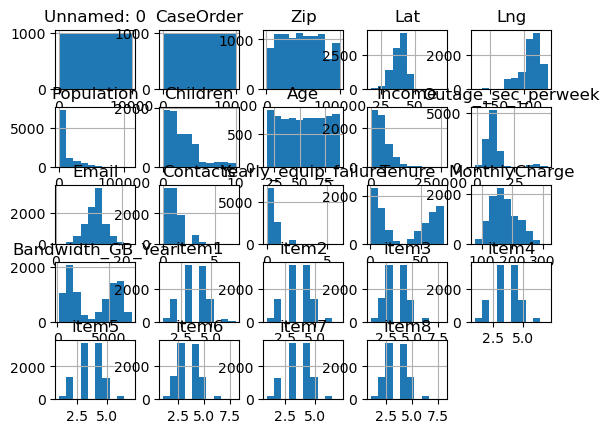

In [10]:
#Determine Outliers
numeric_columns = data.select_dtypes(include=['number']).columns
z_scores = data[numeric_columns].apply(zscore)
outlier_threshold = 3
outlier_mask = (z_scores > outlier_threshold) | (z_scores < -outlier_threshold)
outliers = data[outlier_mask.any(axis=1)]
outlier_counts={}
for column in numeric_columns:
    lower_bound = data[column].mean() - 3 * data[column].std()
    upper_bound = data[column].mean() + 3 * data[column].std()
    num_outliers = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()
    outlier_counts[column] = num_outliers
# Print
print("Rows with outliers:")
print(outliers)
for column, count in outlier_counts.items():
    print(f"Outliers in {column}: {count}")
data.hist()